<a href="https://colab.research.google.com/github/Stephaniesunsun/sentiment_analysis_texts/blob/master/message_analysis_D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install transformers
from transformers import AutoModelForSequenceClassification
from transformers import TFAutoModelForSequenceClassification
from transformers import AutoTokenizer
import numpy as np
from scipy.special import softmax
import csv
import urllib.request

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 49.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 65.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 20.2 MB/s eta 0:00:00


In [ ]:
task = 'sentiment'
MODEL = f"cardiffnlp/twitter-roberta-base-{task}"

tokenizer = AutoTokenizer.from_pretrained(MODEL)

labels=[]
mapping_link = f"https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/{task}/mapping.txt"
with urllib.request.urlopen(mapping_link) as f:
    html = f.read().decode('utf-8').split("\n")
    csvreader = csv.reader(html, delimiter='\t')
labels = [row[1] for row in csvreader if len(row) > 1]


In [ ]:
# PT
model = AutoModelForSequenceClassification.from_pretrained(MODEL)
model.save_pretrained(MODEL)


In [ ]:
#%ls
#%cd sample_data
texts_with_scores=[]

class Data:
  def __init__(self, texts):
    self.texts = texts
    
  def process(self):
    for text in self.texts:
      encoded_input = tokenizer(text, return_tensors='pt')
      output = model(**encoded_input)
      scores = output[0][0].detach().numpy()
      scores = softmax(scores) 
      ranking = np.argsort(scores)
      ranking = ranking[::-1]
      highest_label=''
      highest_score=-1

      for i in range(scores.shape[0]):
        l = labels[ranking[i]]
        s = scores[ranking[i]]
        if(s>highest_score):
          highest_label = l
          highest_score = s
      
      texts_with_scores.append((text, highest_label, highest_score))
  

with open('d_text.txt') as f:
  lines = f.readlines()
  data = Data(lines)
  data.process()
  


TypeError: ignored

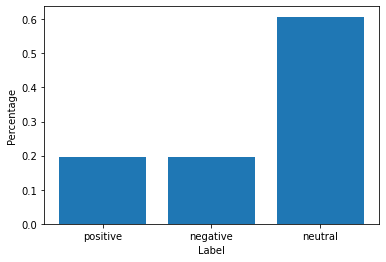

positive_percentage:  0.19536423841059603
neagtive_percentage:  0.19701986754966888
neutral_percentage:  0.6076158940397351


In [ ]:
import matplotlib.pyplot as plt

positive =0
negative =0
neutral =0
for line in texts_with_scores:
  if line[1]=='positive':
    positive+=1
  elif line[1]=='negative':
    negative+=1
  elif line[1]=='neutral':
    neutral+=1

positive_percentage = positive/len(texts_with_scores)
neagtive_percentage= negative/len(texts_with_scores)
neutral_percentage = neutral/len(texts_with_scores)

x = ('positive', 'negative', 'neutral')
y = (positive_percentage, neagtive_percentage, neutral_percentage)

plt.bar(x,y,align='center')
plt.xlabel('Label')
plt.ylabel('Percentage')
plt.show()

print('positive_percentage: ',positive_percentage)
print('neagtive_percentage: ',neagtive_percentage)
print('neutral_percentage: ', neutral_percentage)